
#  Subsetting rows with .query()

##  Assignment 

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order. 

The tables `gdp` and `pop` have been loaded for you.

##  Pre exercise code 

```
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

fn_pop = 'https://assets.datacamp.com/production/repositories/5486/datasets/9286ce7e626920e0494a752892d88f4ce2f30f94/pop_by_country_aus_and_swe.p'
fn_gdp = 'https://assets.datacamp.com/production/repositories/5486/datasets/418d801711e7703d89cf16d007f0af25a9d7f343/quarterly_gdp_by_country_aus_and_swe.p'

gdp = load(urllib.request.urlopen(fn_gdp))
pop = load(urllib.request.urlopen(fn_pop))
```


In [81]:
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

gdp = pd.read_pickle("pop_by_country_aus_and_swe.p")
pop = pd.read_pickle("quarterly_gdp_by_country_aus_and_swe.p")

##  Instructions 

- Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date` with the fill feature, save to `gdp_pop` and print.


In [82]:
gdp_pop = pd.merge_ordered(gdp, pop, on=["country", "date"], fill_method="ffill")

In [83]:
gdp_pop

,date,country,pop,series_code_x,gdp,series_code_y
0,1990-01-01,Australia,17065100,SP.POP.TOTL,158051.13240,NYGDPMKTPSAKD
1,1990-04-01,Australia,17065100,SP.POP.TOTL,158263.58160,NYGDPMKTPSAKD
2,1990-07-01,Australia,17065100,SP.POP.TOTL,157329.27900,NYGDPMKTPSAKD
3,1990-09-01,Australia,17065100,SP.POP.TOTL,158240.67810,NYGDPMKTPSAKD
4,1991-01-01,Australia,17284000,SP.POP.TOTL,156195.95350,NYGDPMKTPSAKD
5,1991-04-01,Australia,17284000,SP.POP.TOTL,155989.03270,NYGDPMKTPSAKD
6,1991-07-01,Australia,17284000,SP.POP.TOTL,156635.85760,NYGDPMKTPSAKD
7,1991-09-01,Australia,17284000,SP.POP.TOTL,156744.05660,NYGDPMKTPSAKD
8,1992-01-01,Australia,17495000,SP.POP.TOTL,157916.08110,NYGDPMKTPSAKD
9,1992-04-01,Australia,17495000,SP.POP.TOTL,159047.82710,NYGDPMKTPSAKD



- Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.


In [84]:
gdp_pop["gdp_per_capita"] = gdp_pop["gdp"] / gdp_pop["pop"]

- Pivot `gdp_pop` so `values='gdp_per_capita'`, `index='date'`, and `columns='country'`, save as `gdp_pivot`.


In [85]:
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')

In [86]:
gdp_pivot

country,Australia,Sweden
date,,
1990-01-01,0.009262,0.009328
1990-04-01,0.009274,0.009415
1990-07-01,0.009219,0.009344
1990-09-01,0.009273,0.009360
1991-01-01,0.009037,0.009228
1991-04-01,0.009025,0.009176
1991-07-01,0.009062,0.009177
1991-09-01,0.009069,0.009253
1992-01-01,0.009026,0.009159


- Use `.query()` to select rows from `gdp_pivot` where `date` is greater than equal to `"1991-01-01"`. Save as `recent_gdp_pop`.


In [87]:
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

<Axes: xlabel='date'>

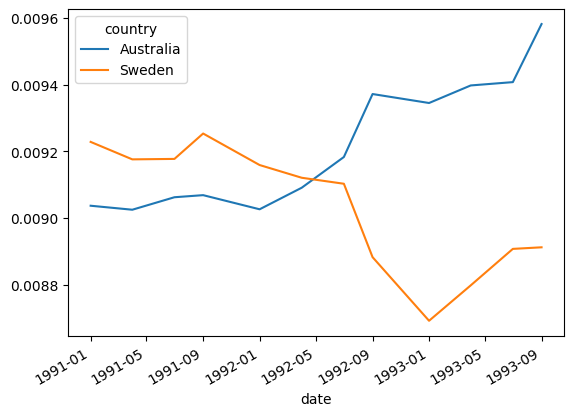

In [88]:
recent_gdp_pop.plot()